In [0]:
import numpy as np
import random
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from cleaning import *
from data_loader import *
from extractNet_connected_vgg11 import *
from extractNet_connected_vgg16 import *
from extractNet_connected_vgg19 import *
from helper import *
from metrics import *
from trainer import *
from visualizer import *

In [0]:
!rm -rf __MACOSX
!rm -rf *.zip

In [2]:
!wget https://github.com/MNRKhan/aps360-project/raw/master/datasets/data_vehicle.zip

--2019-03-22 05:59:39--  https://github.com/MNRKhan/aps360-project/raw/master/datasets/data_vehicle.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MNRKhan/aps360-project/master/datasets/data_vehicle.zip [following]
--2019-03-22 05:59:40--  https://raw.githubusercontent.com/MNRKhan/aps360-project/master/datasets/data_vehicle.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3334722 (3.2M) [application/zip]
Saving to: ‘data_vehicle.zip’

data_vehicle.zip    100%[===================>]   3.18M  --.-KB/s    in 0.1s    

2019-03-22 05:59:40 (30.8 MB/s) - ‘data_vehicle.zip’ saved 

In [0]:
!unzip data_vehicle.zip

In [0]:
!rm -rf __MACOSX
!rm -rf *.zip
!rm -rf data_loader.py

In [0]:
# Set random seeds
torch.manual_seed(360)
np.random.seed(360)
random.seed(360)

# Form dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = ImageMaskDataset("/content/data", transform)

# Dataset sizes
size = len(dataset)

train_size = int(0.6 * size)
valid_size = int(0.2 * size)
test_size = size - train_size - valid_size

# Splitting datasets
train_data, valid_data, test_data = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])

# Making dataloader
train = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=1)
valid = DataLoader(valid_data, batch_size=64, shuffle=True, num_workers=1)

In [0]:
net = extractNet_connected_vgg19()

Epoch:0, Train IoU:0.3756, Train Loss:0.0147|Valid IoU:0.3655, Valid Loss:0.0152
Epoch:1, Train IoU:0.3756, Train Loss:0.0147|Valid IoU:0.3633, Valid Loss:0.0150
Epoch:2, Train IoU:0.4471, Train Loss:0.0142|Valid IoU:0.4221, Valid Loss:0.0148
Epoch:3, Train IoU:0.5325, Train Loss:0.0138|Valid IoU:0.4904, Valid Loss:0.0142
Epoch:4, Train IoU:0.5736, Train Loss:0.0131|Valid IoU:0.5235, Valid Loss:0.0137
Epoch:5, Train IoU:0.6049, Train Loss:0.0127|Valid IoU:0.5500, Valid Loss:0.0134
Epoch:6, Train IoU:0.6304, Train Loss:0.0125|Valid IoU:0.5706, Valid Loss:0.0132
Epoch:7, Train IoU:0.6606, Train Loss:0.0124|Valid IoU:0.5983, Valid Loss:0.0130
Epoch:8, Train IoU:0.6676, Train Loss:0.0122|Valid IoU:0.5979, Valid Loss:0.0128
Epoch:9, Train IoU:0.7182, Train Loss:0.0120|Valid IoU:0.6483, Valid Loss:0.0128
Epoch:10, Train IoU:0.7157, Train Loss:0.0118|Valid IoU:0.6263, Valid Loss:0.0125
Epoch:11, Train IoU:0.7589, Train Loss:0.0119|Valid IoU:0.6777, Valid Loss:0.0125
Epoch:12, Train IoU:0.7609

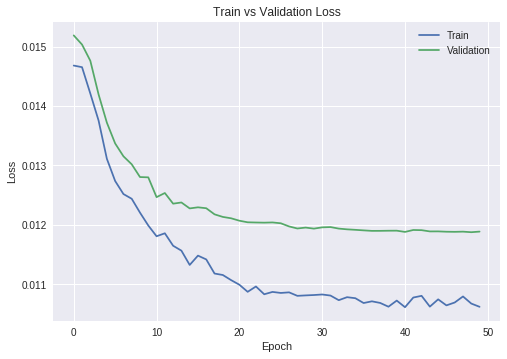

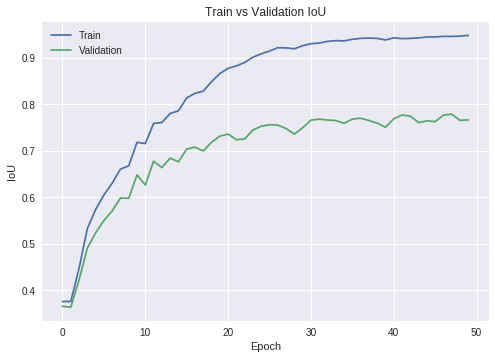

In [12]:
trainModel(net, train, valid, batch_size=64, num_epochs=50, checkpoint=True)

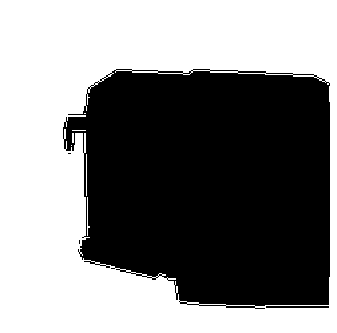

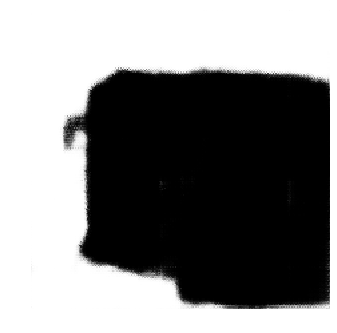

<Figure size 576x396 with 0 Axes>

In [13]:
# After training (train set)
img, target = train_data[0]
target = target.squeeze(0).detach().numpy()
out = torch.sigmoid(net(img.unsqueeze(0)))
out = out.squeeze(0).squeeze(0).detach().numpy()
imshow(target)
imshow(out)

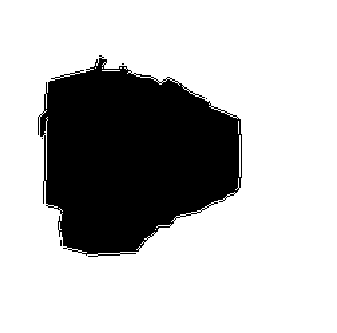

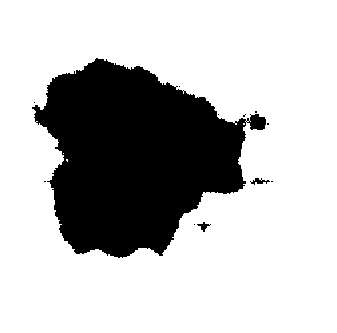

<Figure size 576x396 with 0 Axes>

In [22]:
# After training (validation set)
img, target = valid_data[0]
target = target.squeeze(0).detach().numpy()
out = torch.sigmoid(net(img.unsqueeze(0)))
out = thresholdProbMask(out.squeeze(0).squeeze(0).detach()).numpy()
imshow(target)
imshow(out)

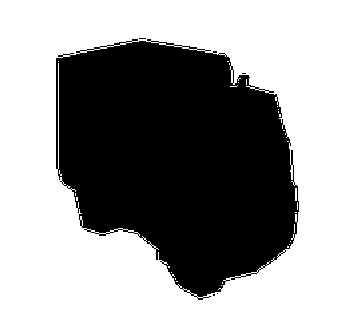

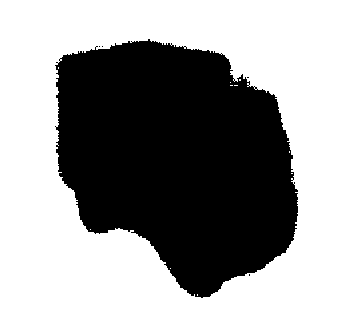

<Figure size 576x396 with 0 Axes>

In [23]:
# After training (validation set)
img, target = valid_data[-3]
target = target.squeeze(0).detach().numpy()
out = torch.sigmoid(net(img.unsqueeze(0)))
out = thresholdProbMask(out).squeeze(0).squeeze(0).detach().numpy()
imshow(target)
imshow(out)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


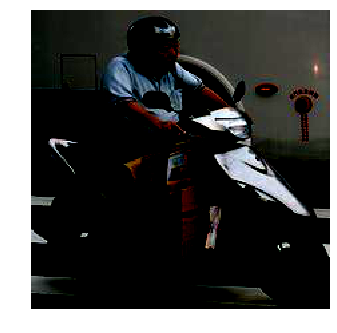

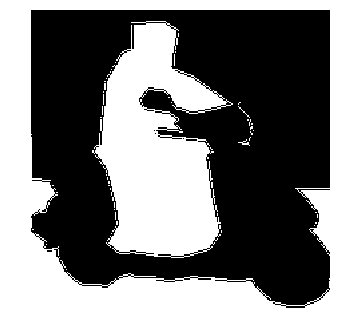

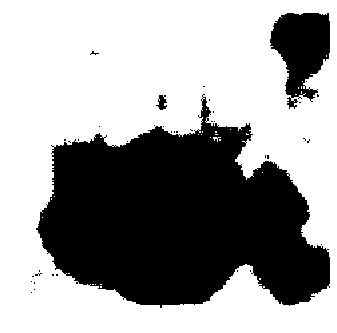

<Figure size 576x396 with 0 Axes>

In [37]:
# After training (validation set)
img, target = valid_data[2]
target = target.squeeze(0).detach().numpy()
out1 = torch.sigmoid(net(img.unsqueeze(0)))
out2= thresholdProbMask(out1).squeeze(0).squeeze(0).detach().numpy()
imshow(np.transpose(img.squeeze(0).detach().numpy(), [1,2,0]))
imshow(target)
imshow(out2)
#imshow(np.transpose(img.detach().numpy()*out2, [1,2,0]))